# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12.5 

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$\nabla_w Q(w) = \dfrac{2}{l}X^T(Xw - y)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку: ник **lipperrdino**

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95484535/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/94768017/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95484584/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95484627/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95484723/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [2]:
data = pd.read_csv('autos.csv')
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


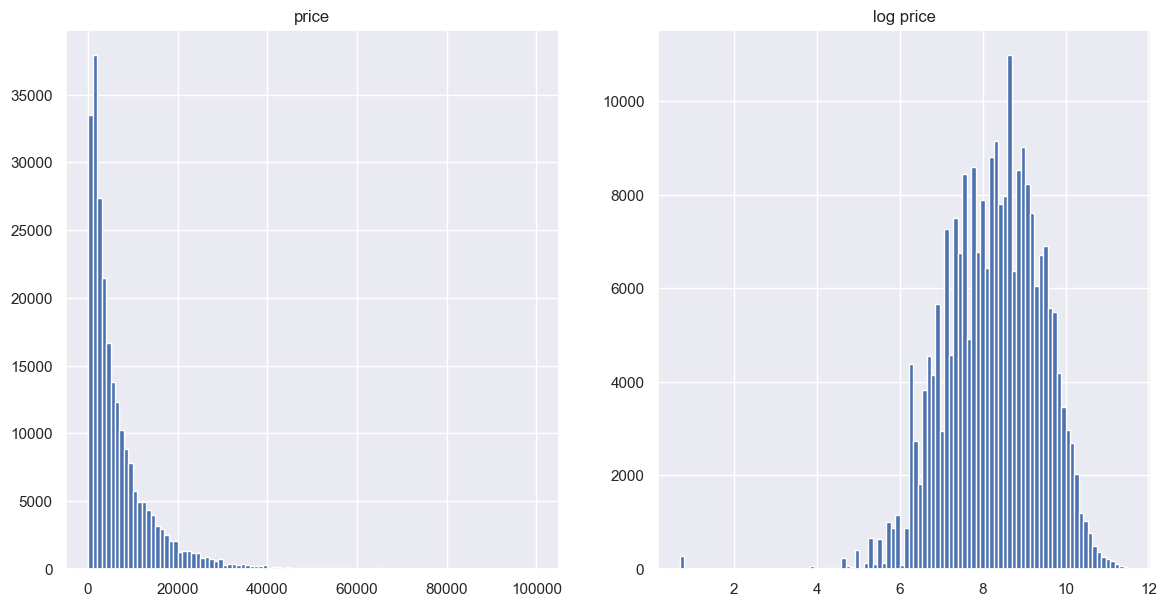

In [3]:
f, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].set_title('price')
ax[1].set_title('log price')
ax[0].hist(data['price'], bins=100)
ax[1].hist(np.log1p(data['price']), bins=100)
plt.show()

In [4]:
data['log_price'] = np.log1p(data['price'])

Посмотрим на выбросы: 

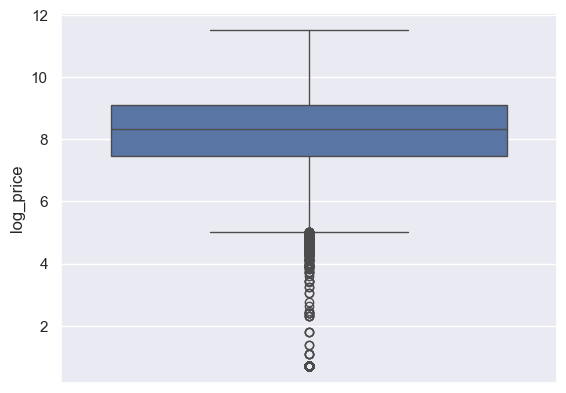

In [5]:
sns.boxplot(data['log_price'])
plt.show()

In [6]:
data = data[data['log_price'] > 5]

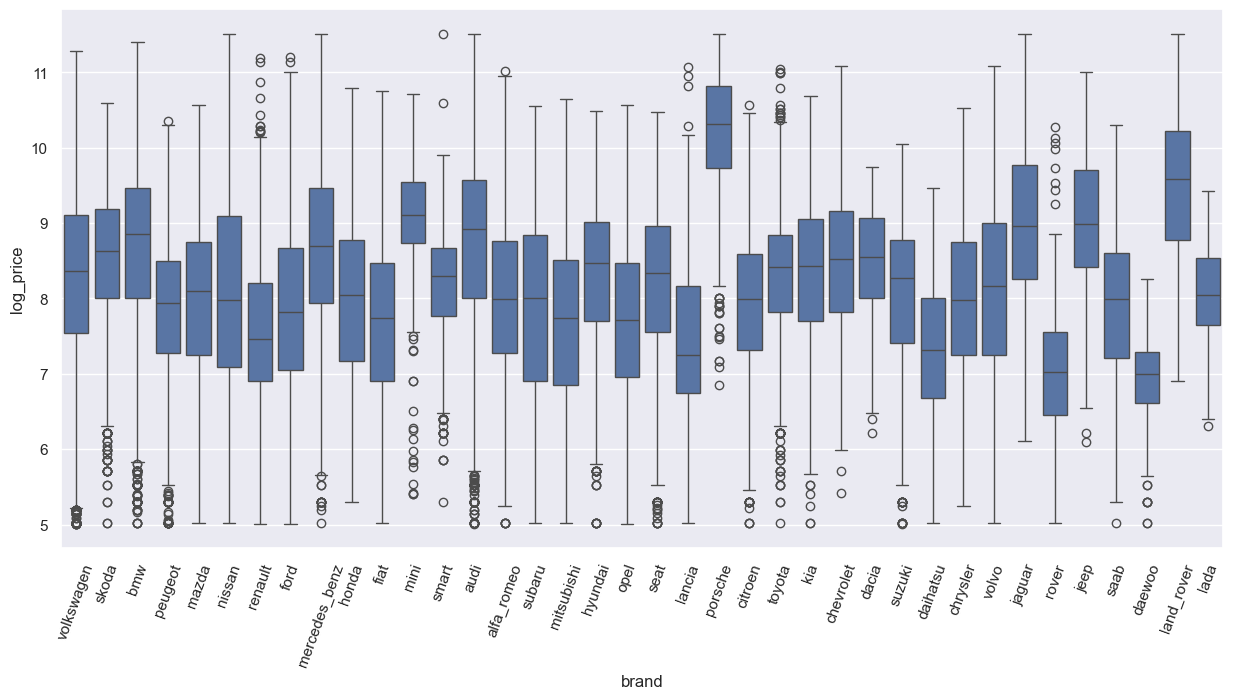

In [7]:
f = plt.figure(figsize=(15, 7))
sns.boxplot(data=data, x=data['brand'], y=data['log_price'])
plt.xticks(rotation=70)
plt.show()

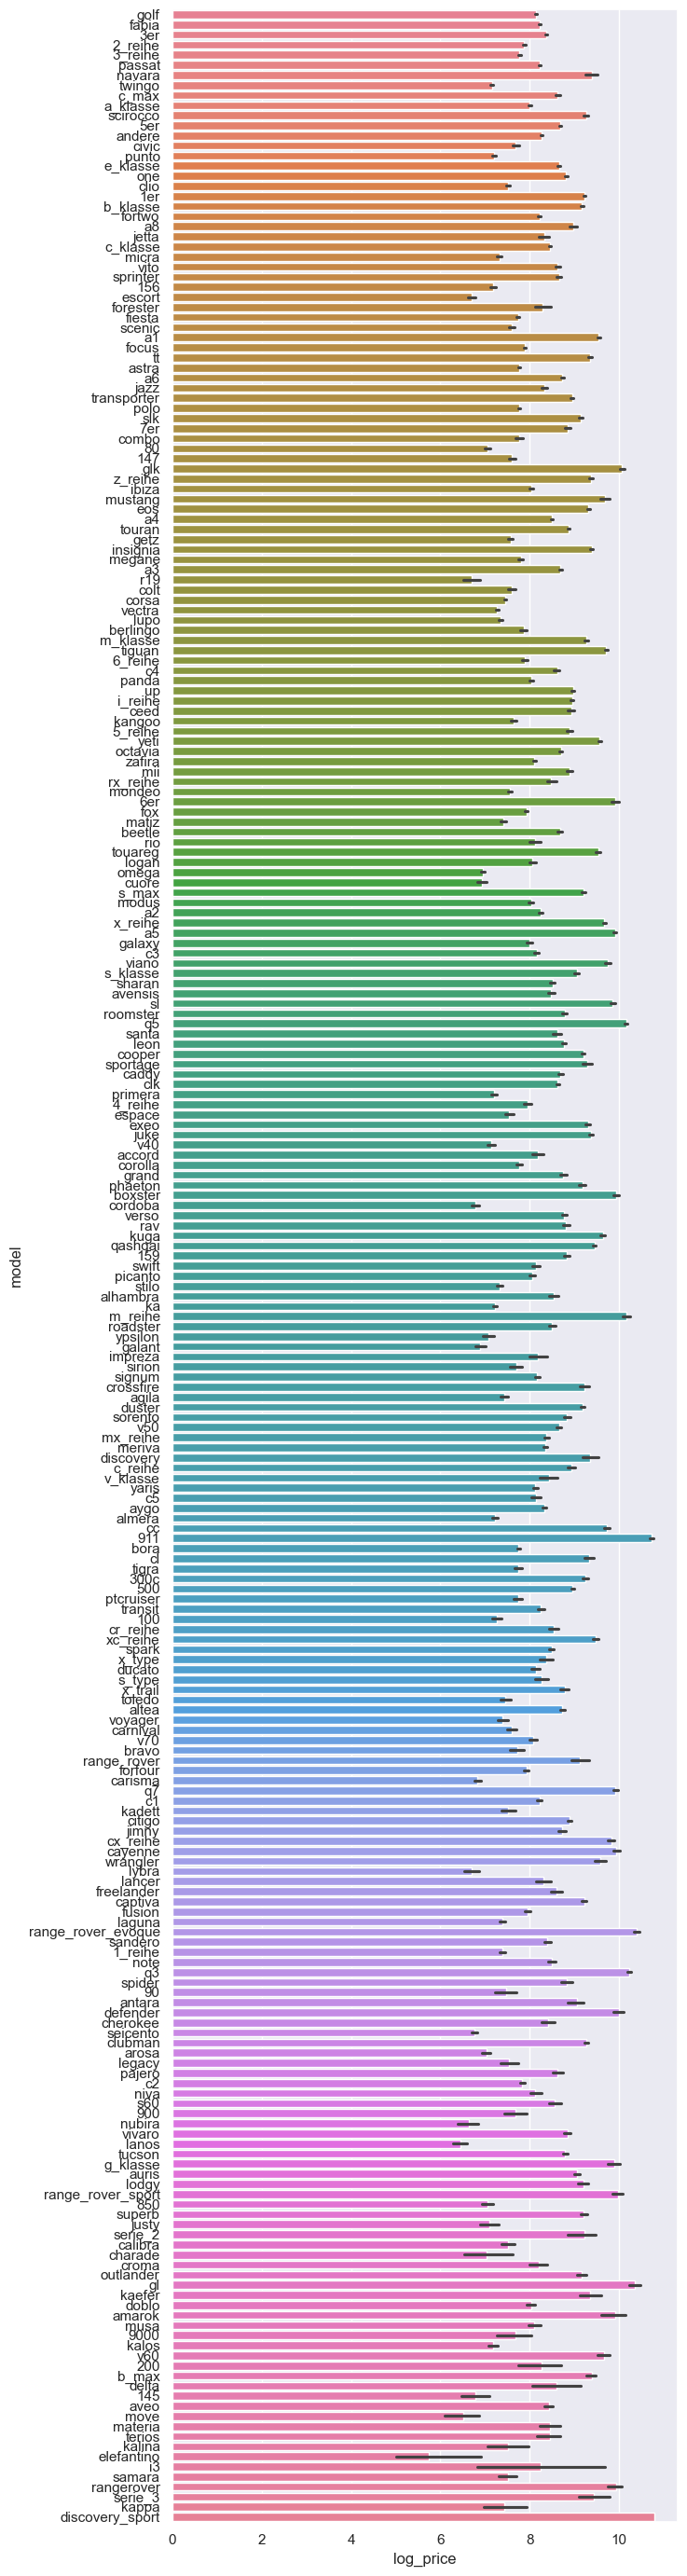

In [8]:
f = plt.figure(figsize=(7, 35))
sns.barplot(data=data, x=data['log_price'], y=data['model'], hue=data['model'])
plt.show()

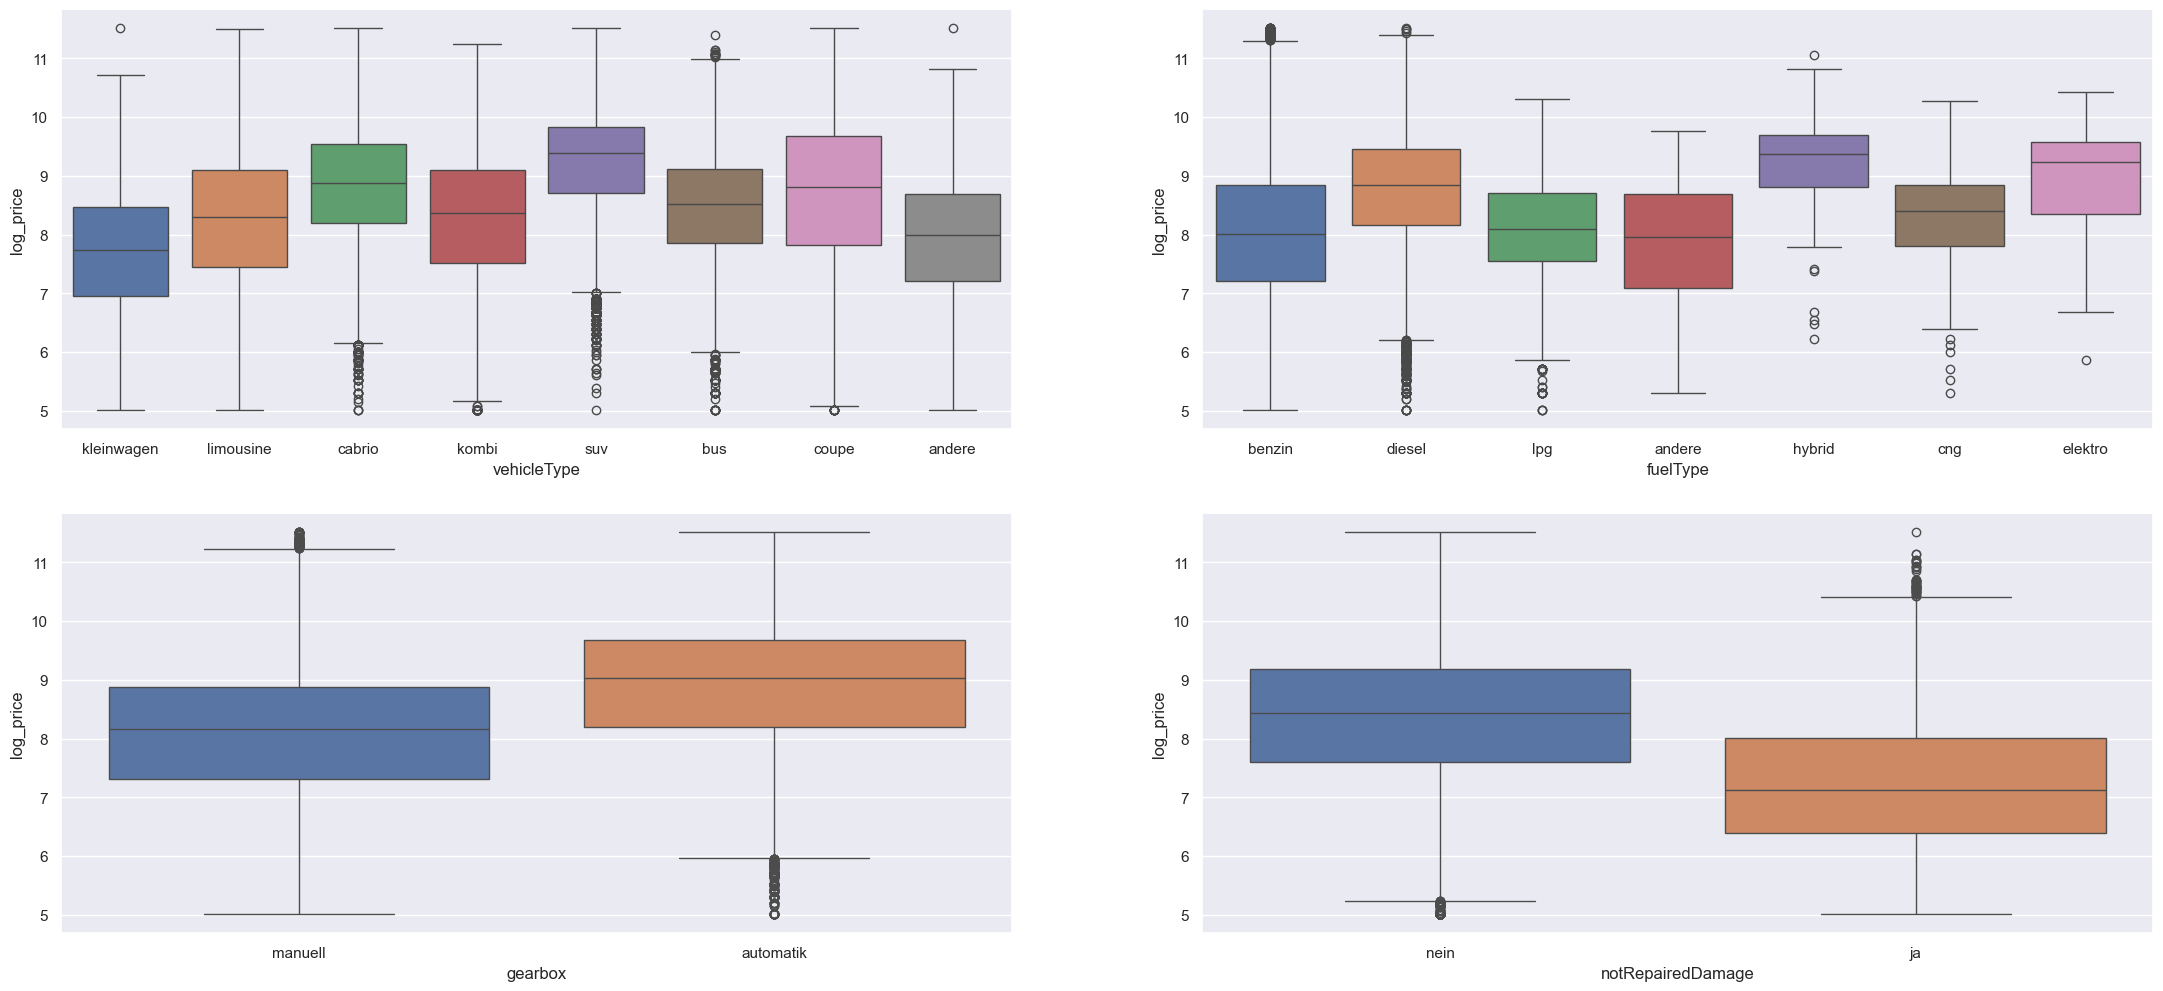

In [17]:
f, ax = plt.subplots(2, 2, figsize=(27, 12))
sns.boxplot(data=data, x=data['vehicleType'], y=data['log_price'], hue=data['vehicleType'], ax=ax[0][0])
sns.boxplot(data=data, x=data['gearbox'], y=data['log_price'], hue=data['gearbox'], ax=ax[1][0])
sns.boxplot(data=data, x=data['fuelType'], y=data['log_price'], hue=data['fuelType'], ax=ax[0][1])
sns.boxplot(data=data, x=data['notRepairedDamage'], y=data['log_price'], hue=data['notRepairedDamage'], ax=ax[1][1])



plt.show()

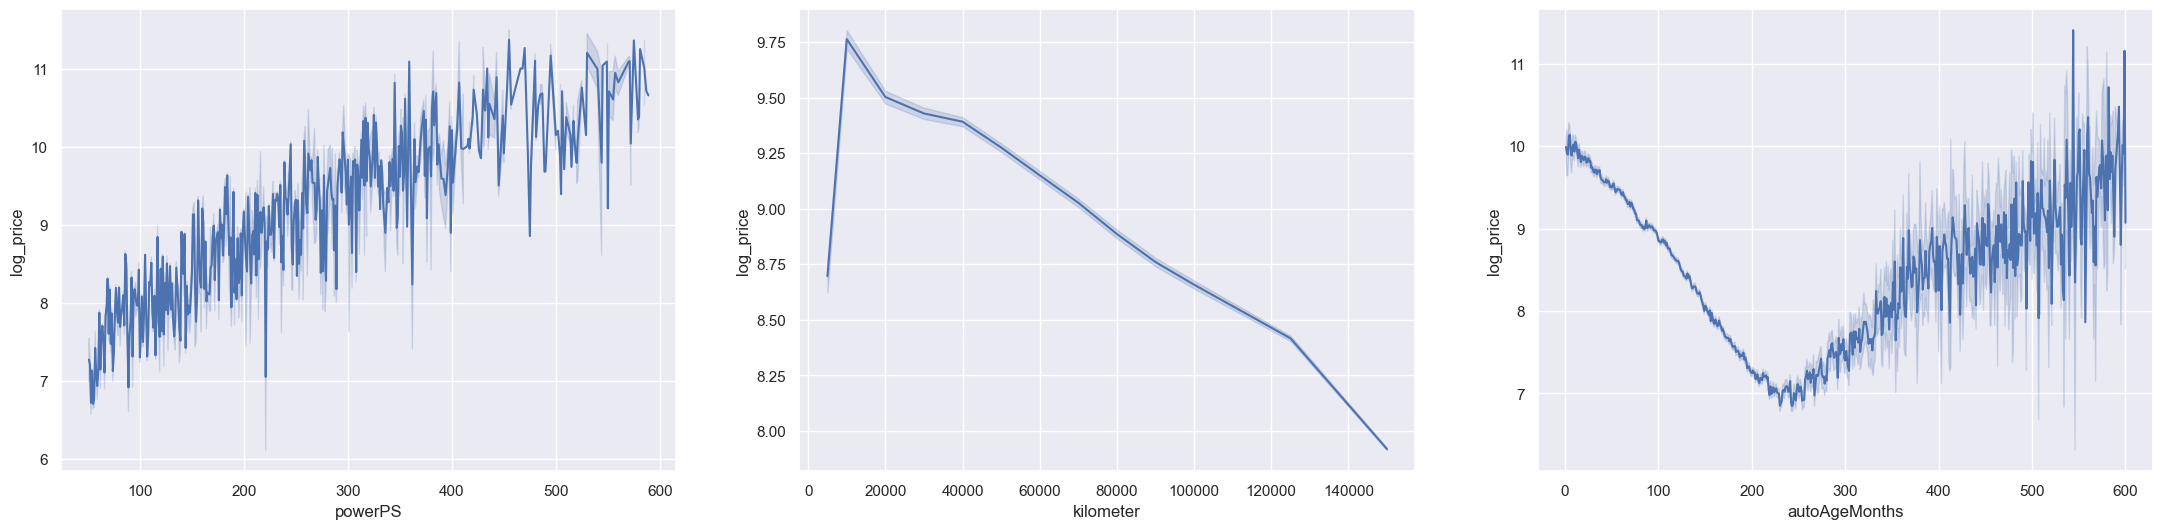

In [15]:

f, ax = plt.subplots(1, 3, figsize=(27, 6))
sns.lineplot(data=data, x=data['powerPS'], y=data['log_price'], ax=ax[0])
sns.lineplot(data=data, x=data['kilometer'], y=data['log_price'], ax=ax[1])
sns.lineplot(data=data, x=data['autoAgeMonths'], y=data['log_price'], ax=ax[2])


plt.show()

In [23]:
cols = list(data.columns)
cols = cols[2:len(cols)-2]

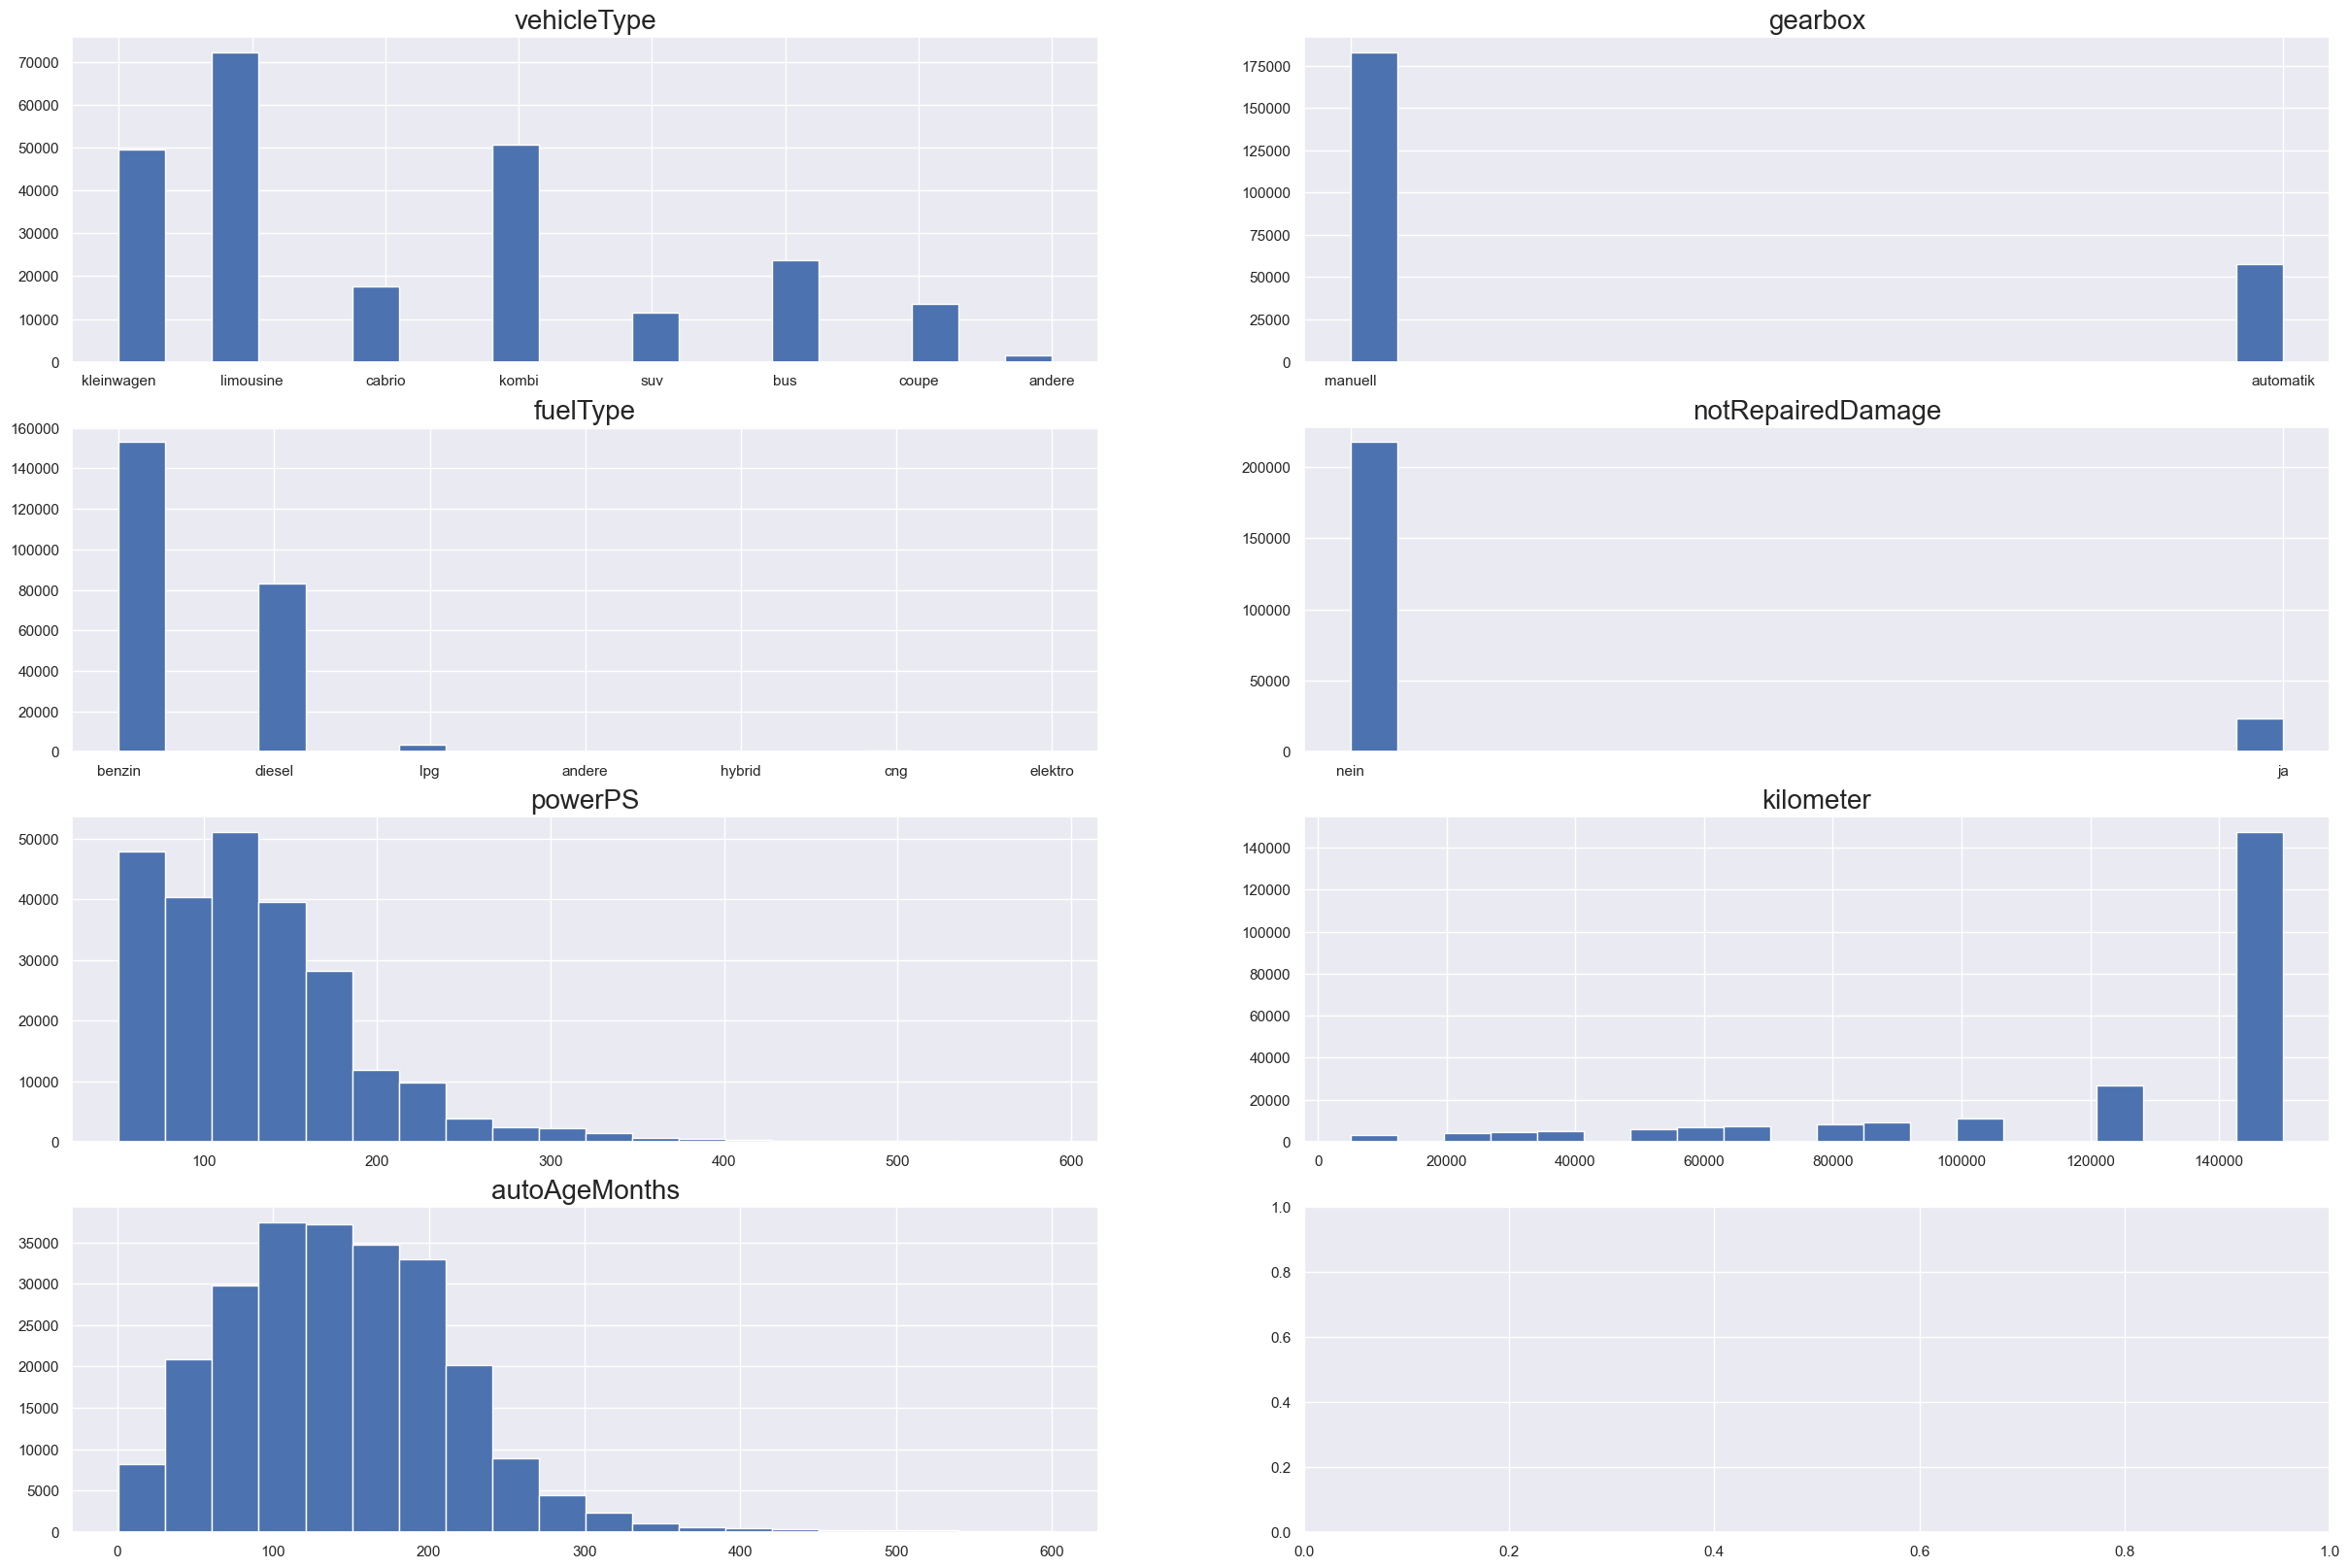

In [24]:
f, ax = plt.subplots(4, 2, figsize=(30, 20))
for i, col in enumerate(cols):
    ax[i//2][(i - i//4*4)%2].set_title(col, fontsize=20)
    ax[i//2][(i - i//4*4)%2].hist(data[col], bins=20)
plt.show()

Убираем выбросы в численных признаках:

In [25]:
import scipy.stats as st

In [26]:
for col in ['powerPS', 'kilometer', 'autoAgeMonths']:
    data['z'] = np.abs(st.zscore(data[col]))
    data = data[data['z'] < 3]
data.drop(columns=['z'], inplace=True)


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [27]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []


In [28]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)
y = y.to_numpy()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [31]:
from collections import defaultdict as dd

In [32]:
lambda_ = np.logspace(-2, 1, 10)

dimention = X_train.shape[1]

methods = ['full', 'stochastic', 'momentum', 'adam']
lr_mse_methods = dd(list)
for method in methods:
    losses = []
    for l in lambda_:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': l
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        losses.append(regression.calc_loss(X_val, y_val))
        # print(method, 'lr: ', round(l ,7), 'loss: ', round(losses[-1], 4))
    lr_mse_methods[method].append(lambda_[np.argmin(losses)])
    lr_mse_methods[method].append(np.min(losses))

In [33]:
pd.DataFrame(lr_mse_methods)

,full,stochastic,momentum,adam
0,1.00000,0.464159,1.000000,1.000000
1,0.29201,0.282651,0.211893,0.194286


In [34]:
from sklearn.metrics import r2_score

In [35]:
stats_mse = dd(dict)
mse_loss_history_methods = dd(list)
for method in methods:

    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': lr_mse_methods[method][0]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)

    stats_mse[method]['train R2'] = r2_score(y_train, y_train_pred)
    stats_mse[method]['test R2'] = r2_score(y_test, y_test_pred)
    stats_mse[method]['train loss'] = regression.calc_loss(X_train, y_train)
    stats_mse[method]['test loss'] = regression.calc_loss(X_test, y_test)
    stats_mse[method]['iterations till convergence'] = regression.conv_iter
    mse_loss_history_methods[method] = np.log1p(regression.loss_history)
    


In [36]:
pd.DataFrame(stats_mse)

,full,stochastic,momentum,adam
train R2,0.765457,0.764351,0.820346,0.835114
test R2,0.767310,0.768141,0.825577,0.840682
train loss,0.281337,0.282664,0.215497,0.197782
test loss,0.278738,0.277743,0.208940,0.190845
iterations till convergence,39.000000,151.000000,120.000000,199.000000


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

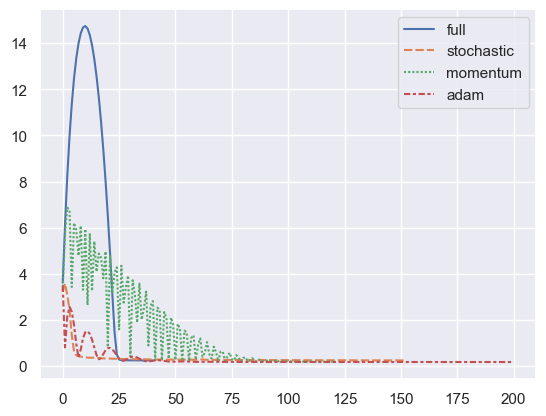

In [37]:
sns.lineplot(mse_loss_history_methods)
plt.show()


Стандартный градиентный спуск сходится быстрее всех, стохастический быстрее приближается к минимуму, но после 50 итераций начинает гулять вокруг оптимума и долго его не находит, метод инерции стабильно с большой амплитудой приближается к оптимуму, адам примерно так же. В целом для данной задачи и данных лучший метод определяется неоднозначно.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [38]:
import time

In [39]:
batch_sizes = np.arange(5, 500, 10)
convergence = []
elapsed_time = []
k = 10

for batch_size in batch_sizes:
    t = np.empty(0)
    iters = np.empty(0)
    for _ in range(k):
        start_time = time.time()
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': dimention,
                'lambda_': lr_mse_methods['stochastic'][0],
                'batch_size':batch_size
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        end_time = time.time()
        
        iters = np.append(iters, regression.conv_iter)
        t = np.append(t, end_time - start_time)

    convergence.append(iters.mean())
    elapsed_time.append(t.mean())


In [40]:
print('average number of iterations to converge: ', convergence)
print('average time to train: ', elapsed_time)

average number of iterations to converge:  [277.1, 261.6, 240.9, 186.1, 185.2, 144.0, 135.0, 120.9, 119.9, 108.9, 109.5, 90.7, 94.2, 99.0, 91.7, 94.5, 90.4, 83.0, 80.3, 77.2, 73.2, 77.0, 74.8, 72.7, 74.2, 72.3, 66.8, 65.3, 67.2, 61.7, 66.6, 60.8, 65.6, 62.9, 60.8, 66.2, 57.5, 59.2, 59.3, 59.9, 55.4, 58.9, 63.7, 59.1, 57.7, 57.5, 58.8, 57.2, 56.9, 53.4]
average time to train:  [0.5936174869537354, 0.48364529609680174, 0.44553556442260744, 0.34486391544342043, 0.3431779146194458, 0.26921401023864744, 0.25255513191223145, 0.22614405155181885, 0.2247983694076538, 0.20441224575042724, 0.20579924583435058, 0.17131400108337402, 0.17739248275756836, 0.18679385185241698, 0.17292451858520508, 0.1789424180984497, 0.17092020511627198, 0.1576695680618286, 0.15290188789367676, 0.1472475528717041, 0.13902063369750978, 0.1468122720718384, 0.14558870792388917, 0.13937070369720458, 0.14176185131073, 0.1384202480316162, 0.12824888229370118, 0.12526228427886962, 0.12894623279571532, 0.11904208660125733, 0

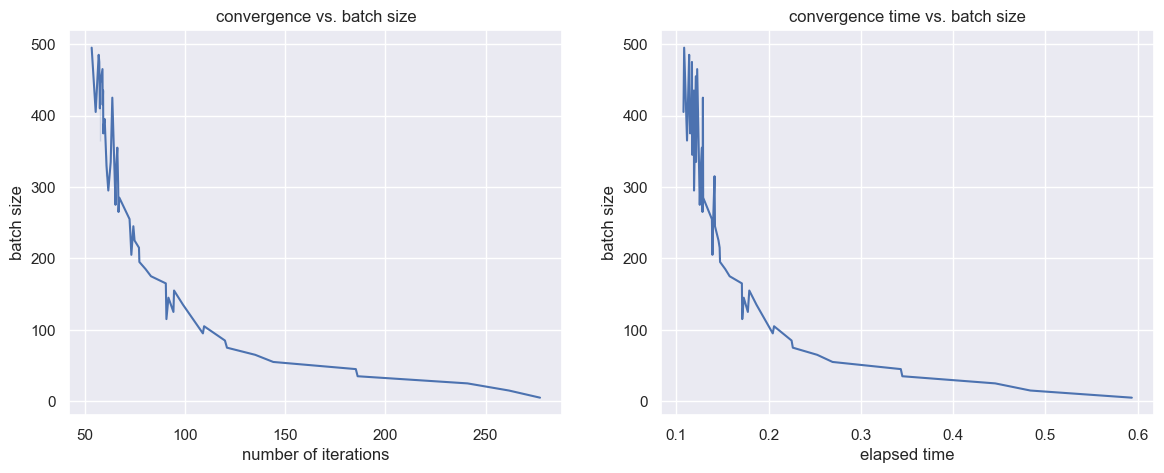

In [41]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].set_title('convergence vs. batch size')
ax[0].set_xlabel('number of iterations')
ax[0].set_ylabel('batch size')
sns.lineplot(x=convergence, y=batch_sizes, ax=ax[0])

ax[1].set_title('convergence time vs. batch size')
ax[1].set_xlabel('elapsed time')
ax[1].set_ylabel('batch size')
sns.lineplot(x=elapsed_time, y=batch_sizes, ax=ax[1])
plt.show()

Можно заметить, что начиная с размера батча 100, количество итераций не превосходит 100 и время, требуемое на сходимость, не превосходит 0.2 секунды. Эти значения очень близки к средним.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/95547630/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [42]:
lambdas = np.logspace(-2, 1, 10)
mus = np.logspace(-3, 1, 10)


best_params_regularized = dd(list)

for method in methods:
    losses_lr = np.array([])
    best_mus = dd(float)
    for l in lambdas:
        losses_mus = np.array([])
        for mu in mus:
            
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {
                    'dimension': dimention,
                    'lambda_': l,
                    'mu': mu
                }
            }
            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(X_train, y_train)


            loss = regression.calc_loss(X_val, y_val)
            losses_mus = np.append(losses_mus, loss)

        best_mus[l] = mus[np.nanargmin(losses_mus)]
        losses_lr = np.append(losses_lr, np.nanmin(losses_mus))
    
    best_params_regularized[method] = [lambdas[np.nanargmin(losses_lr)], best_mus[lambdas[np.nanargmin(losses_lr)]], np.nanmin(losses_lr)]


/Users/annal/ml1/hw3/descents.py:256: RuntimeWarning: invalid value encountered in multiply
  return (super().calc_gradient(x, y) + l2_gradient * self.mu) * mask


In [43]:
best_params_regularized

defaultdict(list,
            {'full': [2.154434690031882,
              0.007742636826811269,
              0.23682173818381966],
             'stochastic': [0.46415888336127775,
              0.021544346900318832,
              0.2798143756705356],
             'momentum': [1.0, 0.0027825594022071257, 0.20703807356880038],
             'adam': [10.0, 0.001, 0.19819153714765972]})

In [44]:
reg_stats = dd(dict)
reg_loss_history_methods = dd(list)

for method in methods:
    descent_config = {
        'descent_name': method,
        'regularized':True,
        'kwargs': {
            'dimension': dimention,
            'lambda_': best_params_regularized[method][0],
            'mu': best_params_regularized[method][1]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)

    reg_stats[method]['train R2'] = r2_score(y_train, y_train_pred)
    reg_stats[method]['test R2'] = r2_score(y_test, y_test_pred)
    reg_stats[method]['train loss'] = regression.calc_loss(X_train, y_train)
    reg_stats[method]['test loss'] = regression.calc_loss(X_test, y_test)
    reg_stats[method]['iterations till convergence'] = regression.conv_iter
    reg_loss_history_methods[method] = np.log1p(regression.loss_history)
    


In [48]:
display(pd.DataFrame(reg_stats))
display(pd.DataFrame(stats_mse))

,full,stochastic,momentum,adam
train R2,0.806658,0.748435,0.825568,0.831192
test R2,0.811262,0.751723,0.831057,0.836883
train loss,0.231917,0.301755,0.209234,0.202488
test loss,0.226088,0.297409,0.202375,0.195397
iterations till convergence,147.000000,188.000000,178.000000,299.000000


,full,stochastic,momentum,adam
train R2,0.765457,0.764351,0.820346,0.835114
test R2,0.767310,0.768141,0.825577,0.840682
train loss,0.281337,0.282664,0.215497,0.197782
test loss,0.278738,0.277743,0.208940,0.190845
iterations till convergence,39.000000,151.000000,120.000000,199.000000


In [46]:
loss_history = dd()
for method in methods:
    loss_history[method] = dd(list)
    loss_history[method]['regularized'] = reg_loss_history_methods[method]
    loss_history[method]['unregularized'] = mse_loss_history_methods[method]


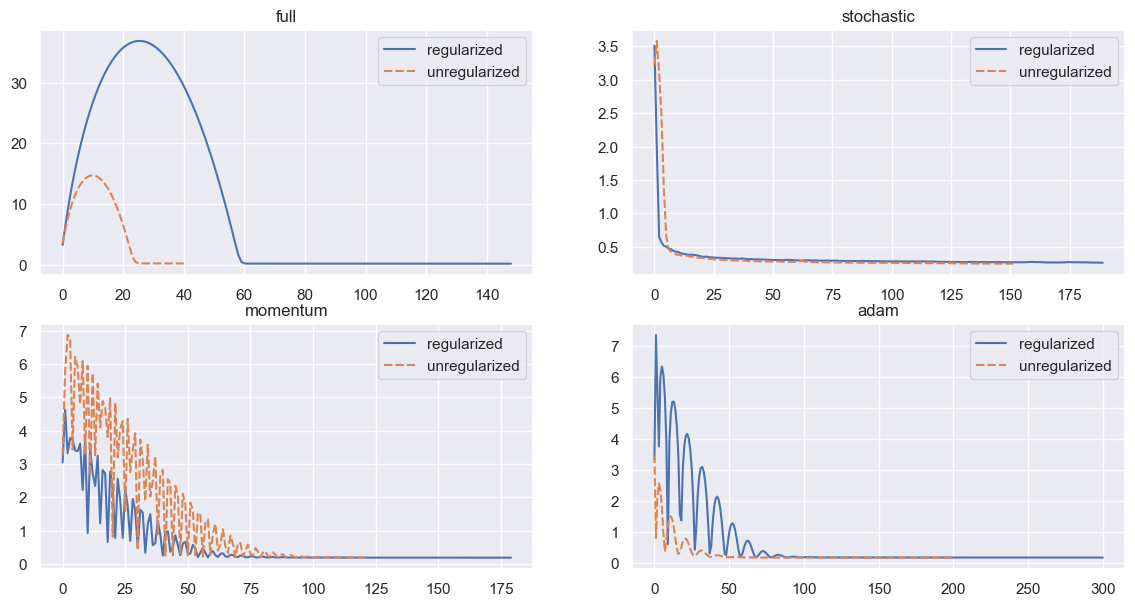

In [47]:
f, ax = plt.subplots(2, 2, figsize=(14, 7))
for i, method in enumerate(methods):
    sns.lineplot(loss_history[method], ax=ax[i//2][(i-i//2*2)%2])
    ax[i//2][(i-i//2*2)%2].set_title(method)


Всем методам с регуляризацией потребовалось сильно больше итераций, однако качество совсем не поменялось

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$\nabla_w L(y, a) = \nabla_w L(y, X^Tw) = \dfrac{1}{l}X^T\tanh(Xw-y)$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [145]:
#подберем лучшую lambda
from descents import LossFunction

lambda_ = np.logspace(-2, 1, 10)

dimention = X_train.shape[1]
methods = ['full', 'stochastic', 'momentum', 'adam']

lr_logcosh_methods = dd(list)
for method in methods:
    losses = []
    for l in lambda_:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': l,
                'loss_function': LossFunction.LogCosh
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        losses.append(regression.calc_loss(X_val, y_val))
        print(method, 'lr: ', round(l ,7), 'loss: ', round(losses[-1], 4))
    lr_logcosh_methods[method].append(lambda_[np.argmin(losses)])
    lr_logcosh_methods[method].append(np.min(losses))

full lr:  0.01 loss:  4.0538
full lr:  0.0215443 loss:  3.4616


full lr:  0.0464159 loss:  1.8677
full lr:  0.1 loss:  0.9195
full lr:  0.2154435 loss:  0.3171
full lr:  0.4641589 loss:  0.1946
full lr:  1.0 loss:  0.1419
full lr:  2.1544347 loss:  0.1207
full lr:  4.6415888 loss:  0.1089
full lr:  10.0 loss:  0.098
stochastic lr:  0.01 loss:  3.5697
stochastic lr:  0.0215443 loss:  4.2996
stochastic lr:  0.0464159 loss:  2.255
stochastic lr:  0.1 loss:  0.7211
stochastic lr:  0.2154435 loss:  0.3551
stochastic lr:  0.4641589 loss:  0.2094
stochastic lr:  1.0 loss:  0.1228
stochastic lr:  2.1544347 loss:  0.1022
stochastic lr:  4.6415888 loss:  0.0988
stochastic lr:  10.0 loss:  0.1017
momentum lr:  0.01 loss:  0.6248
momentum lr:  0.0215443 loss:  0.3038
momentum lr:  0.0464159 loss:  0.1777
momentum lr:  0.1 loss:  0.1455
momentum lr:  0.2154435 loss:  0.1317
momentum lr:  0.4641589 loss:  0.1081
momentum lr:  1.0 loss:  0.0959
momentum lr:  2.1544347 loss:  0.0915
momentum lr:  4.6415888 loss:  0.0863
momentum lr:  10.0 loss:  0.0843
adam lr:  0

In [146]:
pd.DataFrame(lr_logcosh_methods)

,full,stochastic,momentum,adam
0,10.000000,4.641589,10.000000,10.000000
1,0.098007,0.098807,0.084331,0.081961


In [147]:
stats_logcosh = dd(dict)
log_cosh_loss_history_methods = dd(list)
for method in methods:

    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': lr_logcosh_methods[method][0],
            'loss_function': LossFunction.LogCosh
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)

    stats_logcosh[method]['train R2'] = r2_score(y_train, y_train_pred)
    stats_logcosh[method]['test R2'] = r2_score(y_test, y_test_pred)
    stats_logcosh[method]['train loss'] = regression.calc_loss(X_train, y_train)
    stats_logcosh[method]['test loss'] = regression.calc_loss(X_test, y_test)
    stats_logcosh[method]['iterations till convergence'] = regression.conv_iter
    log_cosh_loss_history_methods[method] = np.log1p(regression.loss_history)
    

In [148]:
display(pd.DataFrame(stats_logcosh))
display(pd.DataFrame(stats_mse))

,full,stochastic,momentum,adam
train R2,0.797220,0.800294,-0.136810,0.835435
test R2,0.802135,0.806194,-0.124245,0.841526
train loss,0.100745,0.100170,0.530765,0.082970
test loss,0.099630,0.098424,0.526488,0.081351
iterations till convergence,248.000000,299.000000,299.000000,166.000000


,full,stochastic,momentum,adam
train R2,0.758242,0.765337,0.818995,0.835579
test R2,0.762012,0.769937,0.825582,0.841117
train loss,0.289991,0.281481,0.217118,0.197226
test loss,0.285084,0.275591,0.208935,0.190324
iterations till convergence,43.000000,128.000000,120.000000,145.000000


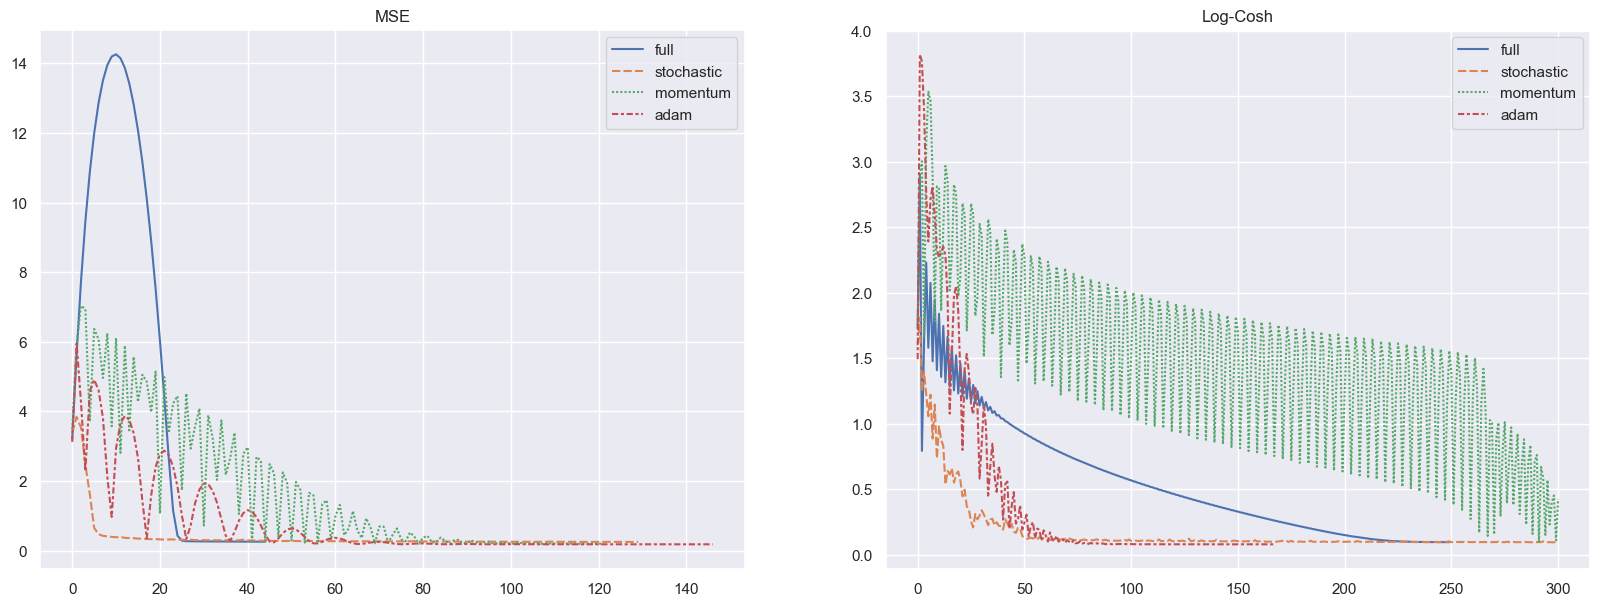

In [149]:
f, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].set_title('MSE')
ax[1].set_title('Log-Cosh')
sns.lineplot(mse_loss_history_methods, ax=ax[0])
sns.lineplot(log_cosh_loss_history_methods, ax=ax[1])
plt.show()

И по графикам, и по статисикам видно, что хотя адам с mse сошелся быстрее, с log-cosh он показал лучшее качество. Да и в целом log-cosh сильно уменьшил лосс для всех методов, но на сходимость не сильно повлиял в среднем.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Приготовим халу - традиционный еврейский хлеб (можно сделать любой формы - по настроению). Ее обычно готовят на Шаббат и все остальные еврейские праздники, без нее жизнь не такая красочная и вкусная:)

Готовить очень просто! Ингредиенты: (получится теста на 2 большие или несколько поменьше)
* мука (2 кг)
* вода (около 1 литра, добавляем на глаз, начинаем с 3-4 стаканов)
* растительное масло (около 300 мл, добавляем на глаз, начинаем с 1 стакана)
* дрожжи (2 пакетика)
* сахар (чем больше, тем слаще, базово 2 стакана)
* соль (1.5-2 столовые ложки, не переборщите)

Способ приготовления:
1) засыпаем муку, соль, сахар (перемешиваем, можно прогнать через сито)

2) заливаем водой, маслом и сыпем дрожжи (можно дрожжи предварительно замочить и дать постоять)

3) месим тесто, убираем комочки, работаем ручками

4) тесто должно быть мягким, не сильно прилепать, чтобы можно было куском большим взять и поднять

5) накрываем тесто и оставляем подниматься - чем дольше оно лежит, тем мягче станет => тем воздушнее будет хала

*лучше сохранять комнатную температуру*

6) начинаем делать грязь!!! лепим что хотим - сердечко, косичку, много булочек итд

7) можно помазать желтком для румянца

8) разогреваем духовку на 190 градусов и ставим запекаться наше чудо

9) угощаем всех и наслаждаемся


![запекаемся](IMG_2532.JPG)

![приготовились](A22048F9-7094-485F-B8EC-C381A906E184.jpg)

![кушаем](IMG_2521.JPG)


### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

Подберем лучшую $\lambda$ для AdaMax (для MSE и LogCosh):

In [150]:
lambda_ = np.logspace(-2, 2, 20)


adamax_mse_logcosh = []
for loss_func in [LossFunction.MSE, LossFunction.LogCosh]:
    losses = []
    for l in lambda_:
        descent_config = {
            'descent_name': 'adamax',
            'kwargs': {
                'dimension': dimention,
                'lambda_': l,
                'loss_function': loss_func
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        losses.append(regression.calc_loss(X_val, y_val))
        # print(method, 'lr: ', round(l ,7), 'loss: ', round(losses[-1], 4))

    adamax_mse_logcosh.append([lambda_[np.argmin(losses)],np.min(losses)])




lr_mse_methods['adamax'] = adamax_mse_logcosh[0]
lr_logcosh_methods['adamax'] = adamax_mse_logcosh[1]


In [151]:

display(pd.DataFrame(lr_mse_methods))
display(pd.DataFrame(lr_logcosh_methods))

,full,stochastic,momentum,adam,adamax
0,1.000000,0.464159,1.000000,4.641589,8.858668
1,0.288586,0.292169,0.211002,0.194207,0.193985


,full,stochastic,momentum,adam,adamax
0,10.000000,4.641589,10.000000,10.000000,23.357215
1,0.098007,0.098807,0.084331,0.081961,0.081928


In [152]:
best_lr_loss_funcs = dd()
best_lr_loss_funcs['MSE'] = lr_mse_methods
best_lr_loss_funcs['LogCosh'] = lr_logcosh_methods





In [153]:
best_lr_loss_funcs

defaultdict(None,
            {'MSE': defaultdict(list,
                         {'full': [1.0, 0.2885856578700599],
                          'stochastic': [0.46415888336127775,
                           0.2921691669350974],
                          'momentum': [1.0, 0.21100152681396042],
                          'adam': [4.6415888336127775, 0.19420663918983375],
                          'adamax': [8.858667904100823, 0.19398520299723024]}),
             'LogCosh': defaultdict(list,
                         {'full': [10.0, 0.09800676681827179],
                          'stochastic': [4.6415888336127775,
                           0.09880709322064352],
                          'momentum': [10.0, 0.0843306278390894],
                          'adam': [10.0, 0.08196108988432707],
                          'adamax': [23.357214690901213,
                           0.08192815944970297]})})

In [154]:
stats_all_funcs = dd()
stats_all_funcs['MSE'] = stats_mse
stats_all_funcs['LogCosh'] = stats_logcosh
stats_all_funcs

defaultdict(None,
            {'MSE': defaultdict(dict,
                         {'full': {'train R2': 0.7582424755644617,
                           'test R2': 0.7620118060901191,
                           'train loss': 0.2899912548530773,
                           'test loss': 0.28508421495973313,
                           'iterations till convergence': 43},
                          'stochastic': {'train R2': 0.7653369061470121,
                           'test R2': 0.7699369965349142,
                           'train loss': 0.281481394273122,
                           'test loss': 0.275590690683414,
                           'iterations till convergence': 128},
                          'momentum': {'train R2': 0.8189952491941731,
                           'test R2': 0.8255815519138279,
                           'train loss': 0.21711752278695226,
                           'test loss': 0.20893450859991042,
                           'iterations till convergence': 120},
    

In [155]:
loss_history_all = dd()
loss_history_all['MSE'] = mse_loss_history_methods
loss_history_all['LogCosh'] = log_cosh_loss_history_methods

In [156]:
# посчитаем статистики и запомним loss_history для adamax и добавим их к данным остальных методов

for loss_func in [LossFunction.MSE, LossFunction.LogCosh]:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': best_lr_loss_funcs[loss_func.name]['adamax'][0],
            'loss_function': loss_func
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)

    stats_all_funcs[loss_func.name]['adamax']['train R2'] = r2_score(y_train, y_train_pred)
    stats_all_funcs[loss_func.name]['adamax']['test R2'] = r2_score(y_test, y_test_pred)
    stats_all_funcs[loss_func.name]['adamax']['train loss'] = regression.calc_loss(X_train, y_train)
    stats_all_funcs[loss_func.name]['adamax']['test loss'] = regression.calc_loss(X_test, y_test)
    stats_all_funcs[loss_func.name]['adamax']['iterations till convergence'] = regression.conv_iter
    loss_history_all[loss_func.name]['adamax'] = np.log1p(regression.loss_history)
    

In [157]:
methods = ['full',
 'stochastic',
 'momentum',
 'adam',
 'adamax']

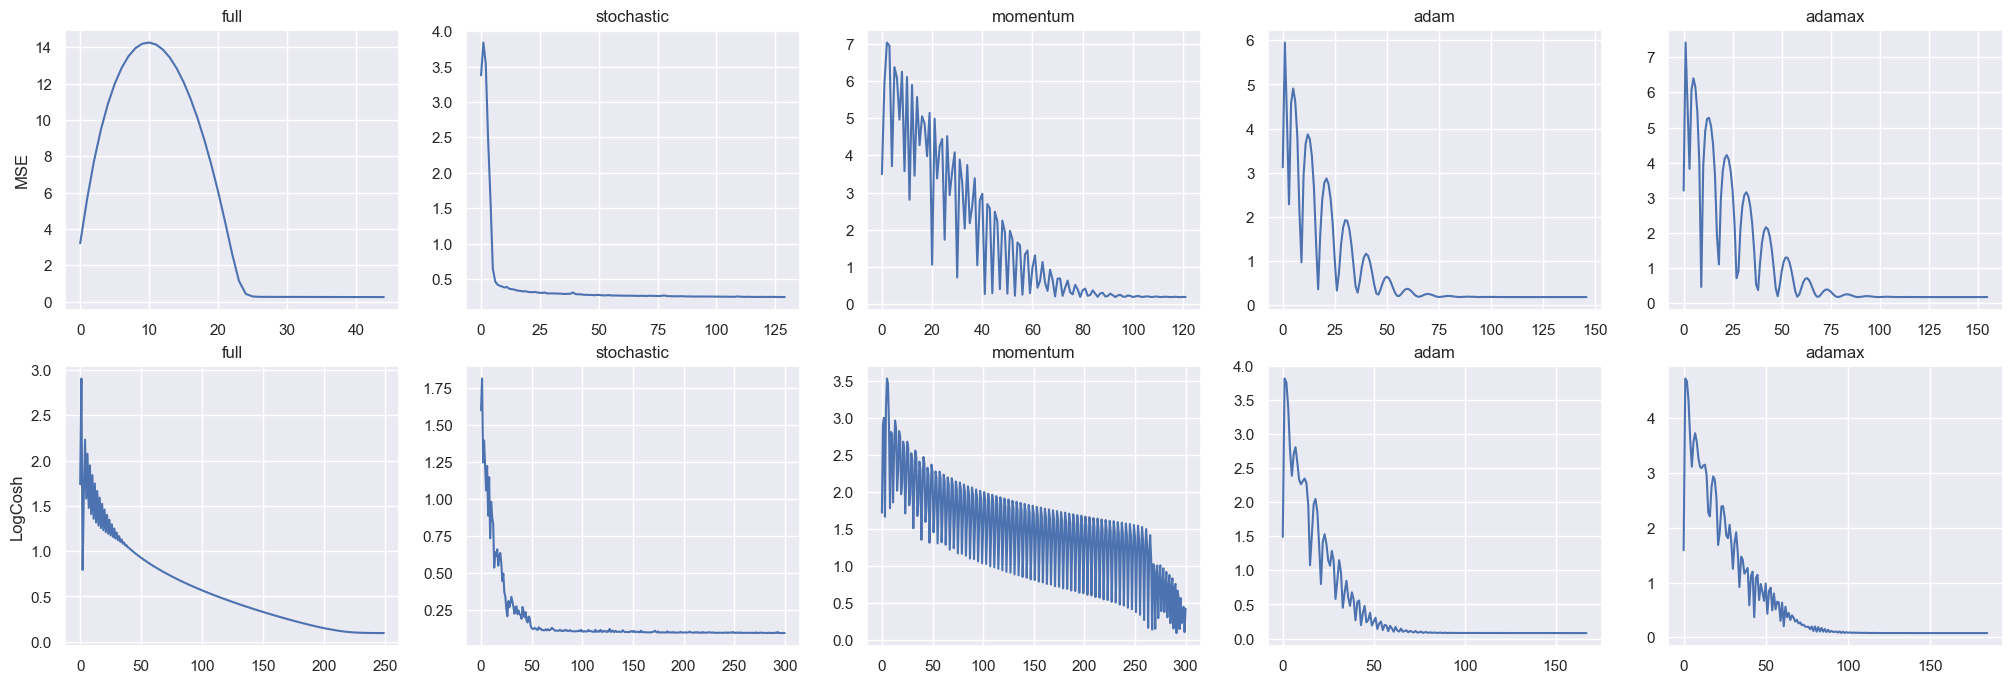

In [158]:
f, ax = plt.subplots(2, 5, figsize=(25, 8))

for i, method in enumerate(methods):
    ax[0][i].set(title=method)
    sns.lineplot(loss_history_all['MSE'][method], ax=ax[0][i])

for i, method in enumerate(methods):
    ax[1][i].set(title=method)
    sns.lineplot(loss_history_all['LogCosh'][method], ax=ax[1][i])

ax[0][0].set_ylabel('MSE')
ax[1][0].set_ylabel('LogCosh')

plt.show()

AdaMax сходится в среднем так же, но показатели совсем чуть-чуть лучше, чем у других методов.

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:


MAE loss:

$$ L(a, y) = |a-y| $$

MAE loss gradient:

$$ \nabla_w L(a, y) = X^T\cdot sign(Xw - y) $$

Huber loss:
$$ L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases} $$

Huber loss gradient:

$$
\nabla_w L_{\delta}(a,y)=\left\{\begin{array}{l}X^T(y\;-\;Xw)\;,\;\;\;\;\;\left|y\;-\;Xw\right|\leqslant\delta\\X^Tsign( y-Xw)\end{array}\right.
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [159]:
best_lr_loss_funcs['MAE'] = dd()
best_lr_loss_funcs['Huber'] = dd()

In [160]:
# подберем лучшие lambda

lambda_ = np.logspace(-2, 1, 10)
dimention = X_train.shape[1]
methods = ['full', 'stochastic', 'momentum', 'adam', 'adamax']
for method in methods:
    for loss_func in [LossFunction.MAE, LossFunction.Huber]:
        losses = []
        for l in lambda_:
            descent_config = {
                'descent_name': method,
                'kwargs': {
                    'dimension': dimention,
                    'lambda_': l,
                    'loss_function': loss_func
                }
            }

            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(X_train, y_train)
            y_train_pred = regression.predict(X_train)
            y_test_pred = regression.predict(X_test)
            losses.append(regression.calc_loss(X_val, y_val))
            print(method, 'lr: ', round(l ,7), 'loss: ', round(losses[-1], 4))


        best_lr_loss_funcs[loss_func.name][method] = [lambda_[np.argmin(losses)], np.min(losses)]


full lr:  0.01 loss:  5.4114
full lr:  0.0215443 loss:  4.353
full lr:  0.0464159 loss:  2.7718
full lr:  0.1 loss:  1.3807
full lr:  0.2154435 loss:  0.5924
full lr:  0.4641589 loss:  0.4427
full lr:  1.0 loss:  0.4142
full lr:  2.1544347 loss:  0.36
full lr:  4.6415888 loss:  0.3735
full lr:  10.0 loss:  0.8317
full lr:  0.01 loss:  4.6629
full lr:  0.0215443 loss:  4.7366
full lr:  0.0464159 loss:  6.7207
full lr:  0.1 loss:  15.0888
full lr:  0.2154435 loss:  27.8911
full lr:  0.4641589 loss:  54.7584
full lr:  1.0 loss:  111.3147
full lr:  2.1544347 loss:  234.8027
full lr:  4.6415888 loss:  501.8255
full lr:  10.0 loss:  1074.2674
stochastic lr:  0.01 loss:  4.7558
stochastic lr:  0.0215443 loss:  4.162
stochastic lr:  0.0464159 loss:  3.0683
stochastic lr:  0.1 loss:  1.4563
stochastic lr:  0.2154435 loss:  0.5659
stochastic lr:  0.4641589 loss:  0.4049
stochastic lr:  1.0 loss:  0.3557
stochastic lr:  2.1544347 loss:  0.3408
stochastic lr:  4.6415888 loss:  0.3815
stochastic lr

In [206]:
# посчитаем статистики и сохраним loss_history для обеих функций и добавим это к данным остальных функций

for loss_func in [LossFunction.MAE, LossFunction.Huber]:
    loss_func = LossFunction.MAE
    stats_all_funcs[loss_func.name] = dd()
    loss_history_all[loss_func.name] = dd(float)
    for method in methods:
        stats_all_funcs[loss_func.name][method] = dd()
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': best_lr_loss_funcs[loss_func.name][method][0],
                'loss_function': loss_func
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)

        stats_all_funcs[loss_func.name][method]['train R2'] = r2_score(y_train, y_train_pred)
        stats_all_funcs[loss_func.name][method]['test R2'] = r2_score(y_test, y_test_pred)
        stats_all_funcs[loss_func.name][method]['train loss'] = regression.calc_loss(X_train, y_train)
        stats_all_funcs[loss_func.name][method]['test loss'] = regression.calc_loss(X_test, y_test)
        stats_all_funcs[loss_func.name][method]['iterations till convergence'] = regression.conv_iter

        loss_history_all[loss_func.name][method] = np.log1p(regression.loss_history)

    
        


In [209]:
for func in stats_all_funcs.keys():
    print(func)
    display(pd.DataFrame(stats_all_funcs[func]))

MSE


,full,stochastic,momentum,adam,adamax
train R2,0.758242,0.765337,0.818995,0.835579,0.835171
test R2,0.762012,0.769937,0.825582,0.841117,0.840715
train loss,0.289991,0.281481,0.217118,0.197226,0.197714
test loss,0.285084,0.275591,0.208935,0.190324,0.190807
iterations till convergence,43.000000,128.000000,120.000000,145.000000,154.000000


LogCosh


,full,stochastic,momentum,adam,adamax
train R2,0.797220,0.800294,-0.136810,0.835435,0.835471
test R2,0.802135,0.806194,-0.124245,0.841526,0.841554
train loss,0.100745,0.100170,0.530765,0.082970,0.082953
test loss,0.099630,0.098424,0.526488,0.081351,0.081327
iterations till convergence,248.000000,299.000000,299.000000,166.000000,184.000000


MAE


,full,stochastic,momentum,adam,adamax
train R2,0.774146,0.788147,0.819270,0.830246,0.787109
test R2,0.779955,0.794491,0.825640,0.837349,0.792121
train loss,0.366412,0.348213,0.313090,0.304331,0.395274
test loss,0.365947,0.347285,0.312542,0.303247,0.394103
iterations till convergence,83.000000,299.000000,149.000000,299.000000,299.000000


Huber


,full,stochastic,momentum,adam,adamax
train R2,-29.325275,-17.887443,-1.392224,-8.013260,-7.711527
test R2,-29.435866,-17.995710,-1.401793,-8.040772,-7.787925
train loss,5.846760,4.203038,1.367114,3.035851,2.840659
test loss,5.853850,4.212593,1.368732,3.038719,2.850542
iterations till convergence,2.000000,1.000000,110.000000,298.000000,291.000000


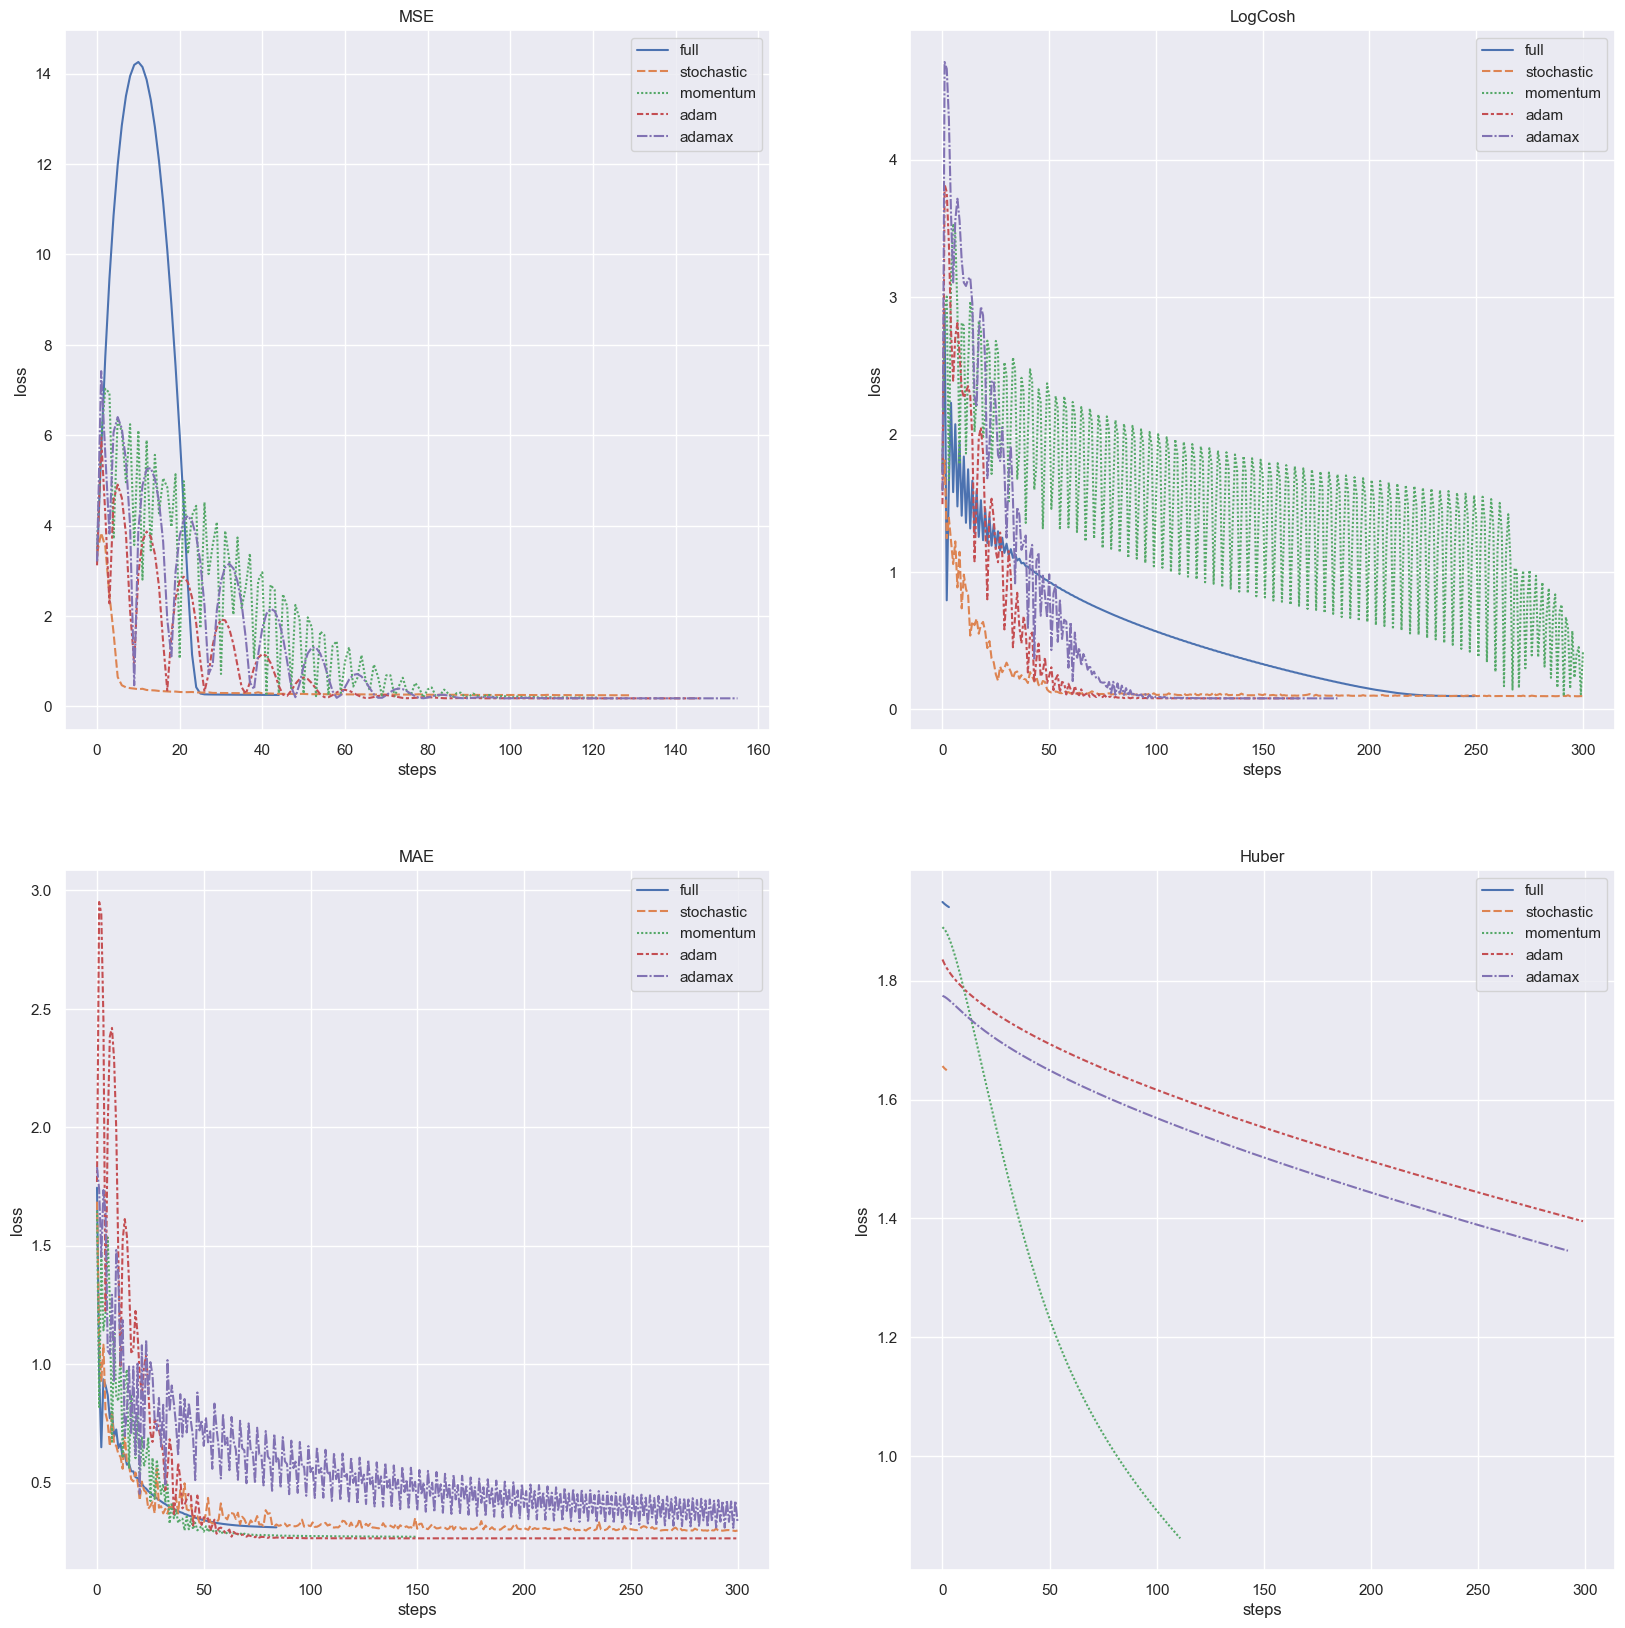

In [218]:
f, ax = plt.subplots(2, 2, figsize=(20, 20))

for i, loss_func in enumerate([LossFunction.MSE, LossFunction.LogCosh, LossFunction.MAE, LossFunction.Huber]):
        ax[i//2][(i-i//2*2)%2].set(xlabel='steps', ylabel='loss', title=loss_func.name)
        sns.lineplot(loss_history_all[loss_func.name], ax=ax[i//2][(i-i//2*2)%2])

plt.show()

In [221]:
# функции для каждого метода

loss_history_for_methods = dd()
for method in methods:
    loss_history_for_methods[method] = dd()
    for loss_func in [LossFunction.MSE, LossFunction.LogCosh, LossFunction.MAE, LossFunction.Huber]:
        loss_history_for_methods[method][loss_func.name] = loss_history_all[loss_func.name][method]

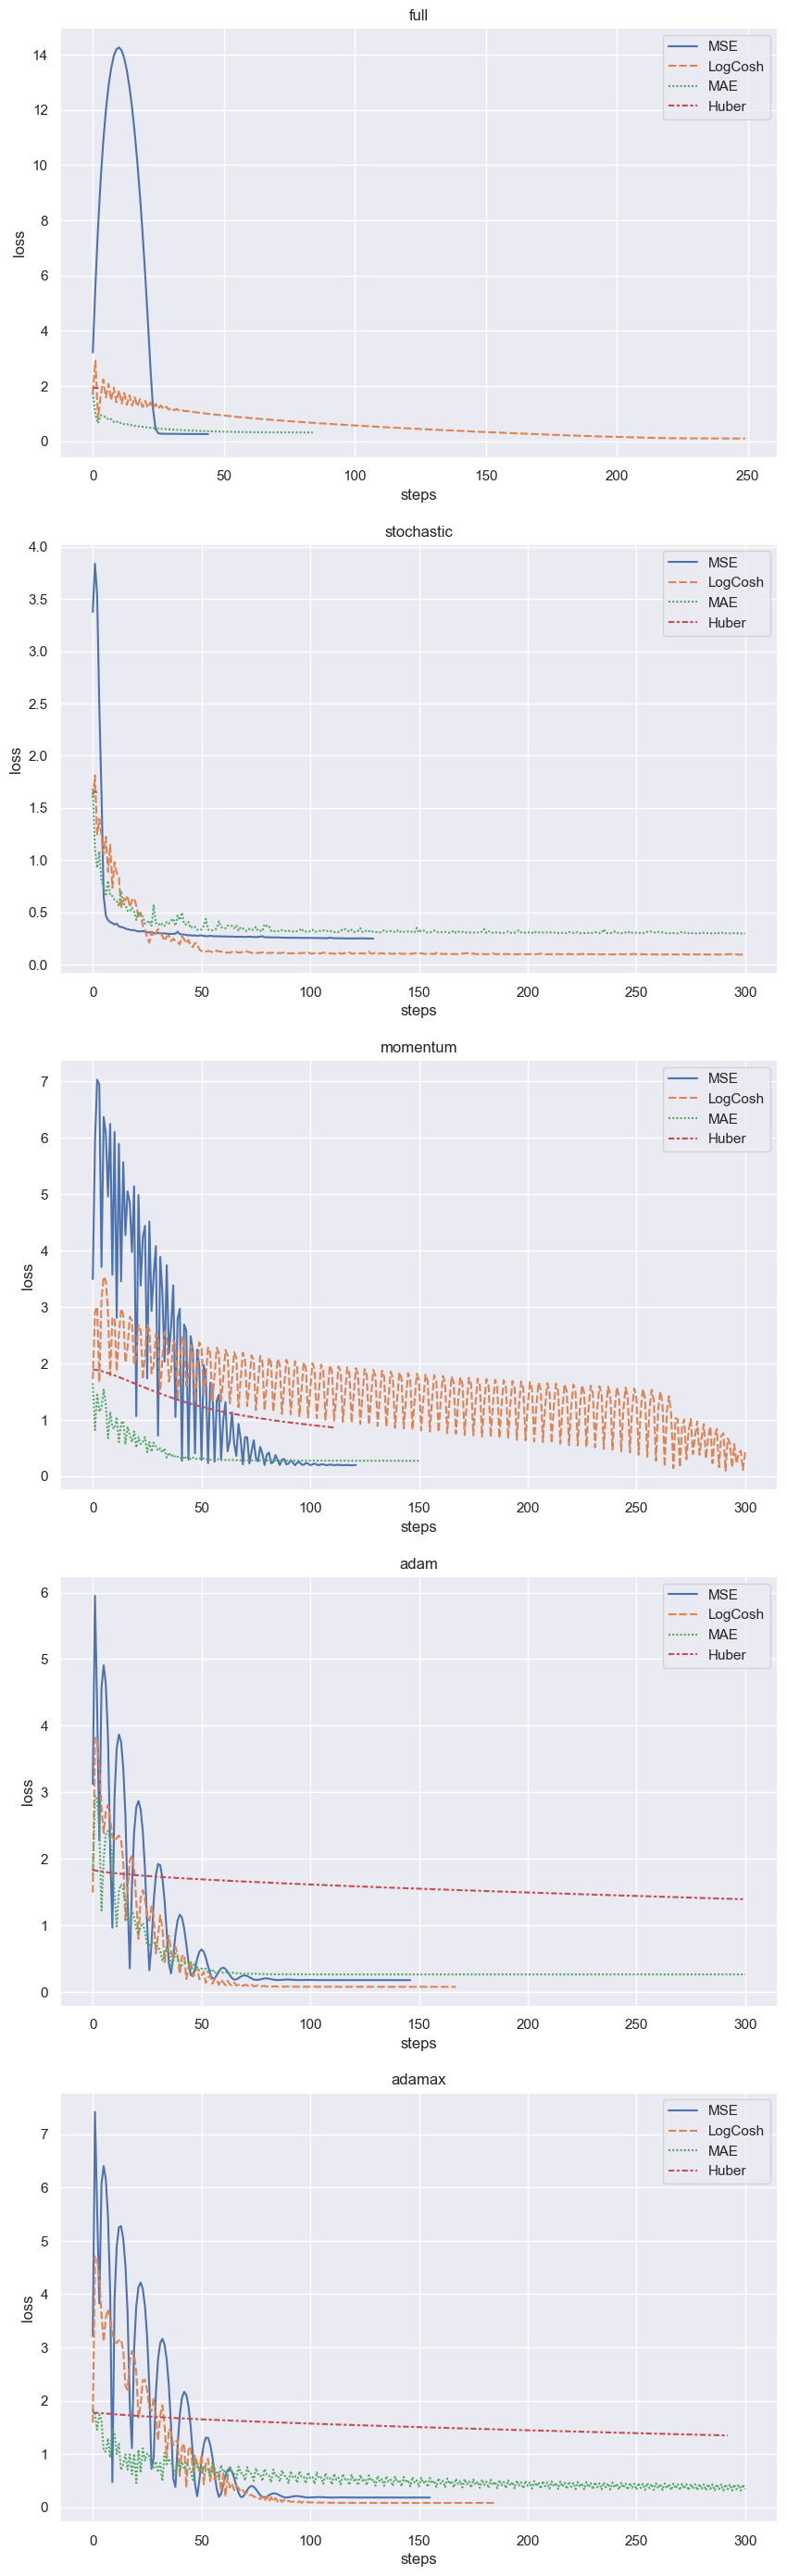

In [224]:
f, ax = plt.subplots(5, 1, figsize=(10, 35))

for i, method in enumerate(methods):
        ax[i].set(xlabel='steps', ylabel='loss', title=method)
        sns.lineplot(loss_history_for_methods[method], ax=ax[i])

plt.show()